In [1]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/2d_pdes.jl");
include("/home/jm2386/Active_Lattice/src/2d_sims.jl");
include("/home/jm2386/Active_Lattice/src/2d_plot.jl");

v1.0


v1.1


v2.1


In [15]:
params = []
DT, DR, N, Nθ, Δx, Lx, Ly, δt, δ, ϕa, ϕp = (1.0, 1.0, 32, 20, 0.04, 2.0, 2.0, 1e-5, 0.1, 0.5, 0.0);
T, save_interval, param_name = (20.0, 0.1, "test")
map([10., 20., 30. , 40.]) do v0
    param = _2d_new_param(DT, v0, DR, N, Nθ, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true)
    push!(params,param)
end
param = params[2]
ts, fs = load_compress_pde(param)
t,f = ts[end], fs[end]

full load


saved


(6.500009999923092, [0.23043457687942012 0.2304264882659903 … 0.2304498003468892 0.23044238847310894; 0.22752742236989104 0.22751461111171295 … 0.2275515333464024 0.22753979457704898; … ; 0.21207437235759694 0.21207471034044167 … 0.2120737351974427 0.2120740455459017; 0.22521945579881691 0.22521603658672626 … 0.22522589050525105 0.22522275769536518;;; 0.26116077575666635 0.2611485088490662 … 0.2611785659395284 0.2611708477150936; 0.24661373132621625 0.2465983840842559 … 0.24663770588525 0.24662690779945684; … ; 0.26939213314747046 0.2693893016194578 … 0.26939238579140173 0.2693931665529694; 0.2698910526646131 0.2698828516125886 … 0.26990111089847624 0.2698971712264182;;; 0.23816644719984112 0.23815953714338625 … 0.23817075265773283 0.23817020542501313; 0.22348628631814074 0.22347681988335216 … 0.2234961762440479 0.2234927724867745; … ; 0.25655264720865656 0.25655392453512044 … 0.2565413319055428 0.2565484273153274; 0.25032512493417863 0.2503216096526763 … 0.25032264557980566 0.25032547

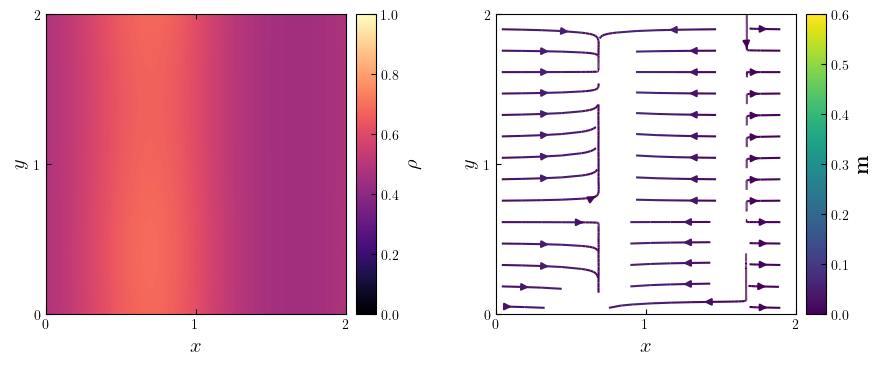

In [18]:
t,f = ts[20], fs[20]
# create fig
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig = plt.figure(figsize=(10,5))
# add image
    ax      = fig.add_axes([0.1, 0.1, 0.3, 0.6])
    cbar_ax = fig.add_axes([0.41, 0.1, 0.02, 0.6])
    plot_pde_rho(ax, cbar_ax, param, f; cmin = 0.0, cmax = 1.0, cbar = true)
    ax      = fig.add_axes([0.55, 0.1, 0.3, 0.6])
    cbar_ax = fig.add_axes([0.86, 0.1, 0.02, 0.6])
    plot_pde_mag(ax, cbar_ax, param, f; cmin = 0.0, cmax = 0.6, cbar = true, density = 0.5)
#
display(fig)

In [61]:
using PyCall
@pyimport matplotlib.animation as anim

fig, axs = plt.subplots(1, 1, figsize=(5,5))
@unpack save_interval = param
scale_factor = 10
interval  = save_interval*scale_factor*1000
frames    = Int64( length(ts)/scale_factor ÷ 1)
function makeframe(i)
        clf()
        ax = fig.add_subplot(111)
        t, f = ts[i+1], fs[i+1]
        # add image
                ax      = fig.add_axes([0.1, 0.1, 0.3, 0.6])
                cbar_ax = fig.add_axes([0.41, 0.1, 0.02, 0.6])
                plot_pde_rho(ax, cbar_ax, param, f; cmin = 0.0, cmax = 1.0, cbar = true)
                ax      = fig.add_axes([0.55, 0.1, 0.3, 0.6])
                cbar_ax = fig.add_axes([0.86, 0.1, 0.02, 0.6])
                plot_pde_mag(ax, cbar_ax, param, f; cmin = -0.0, cmax = 0.6, cbar = true, density = 0.5)
        #
        return fig
end
myanim = anim.FuncAnimation(fig, makeframe, frames=frames, interval=interval)
# Convert it to an MP4 movie file and saved on disk in this format.
        filename, pathname = pde_vid_save_name(param,ts[end])
        mkpath(pathname)
        myanim[:save](filename, bitrate=-1, dpi= 100, extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])